In [76]:
import pandas as pd
file_path = './related_skills.csv'
df_mess = pd.read_csv(file_path)
def combine_columns(row):
    return ' '.join(map(str, row))
df = df_mess.apply(combine_columns, axis=1)
df = pd.DataFrame(df)
df.rename(columns={'0': 'job_title'})
df.columns = ['job_title']
df['job_title'] = df['job_title'].str.replace('\+d','')
df.head()


,job_title
0,a certified network certified laptops n certif...
1,a certified it technician n certified network ...
2,a certified professional network certified com...
3,a quick learner product validation great commu...
4,a1 assessor ptlls assessor training nvqs train...


In [77]:
import nltk
from nltk import word_tokenize
# nltk.download('punkt')
df["job_title"] = df["job_title"].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else '')
df.head()

,job_title
0,"[a, certified, network, certified, laptops, n,..."
1,"[a, certified, it, technician, n, certified, n..."
2,"[a, certified, professional, network, certifie..."
3,"[a, quick, learner, product, validation, great..."
4,"[a1, assessor, ptlls, assessor, training, nvqs..."


In [79]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['job_title'] = df['job_title'].apply(lambda x: [word for word in x if word not in stop_words])

df['job_title']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [certified, network, certified, laptops, n, ce...
1        [certified, technician, n, certified, network,...
2        [certified, professional, network, certified, ...
3        [quick, learner, product, validation, great, c...
4        [a1, assessor, ptlls, assessor, training, nvqs...
                               ...                        
28929    [zsh, bash, git, linux, vim, python, ruby, ema...
28930    [zumba, aerobics, zumba, instruction, certifie...
28931    [zumba, instruction, zumba, dance, instruction...
28932    [zurb, foundation, jquery, css, javascript, tw...
28933    [zyxel, dlink, draytek, windows, server, links...
Name: job_title, Length: 28934, dtype: object

In [80]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df["job_title"] = df.iloc[:, 0] = df["job_title"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df["job_title"]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lolak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        [certified, network, certified, laptop, n, cer...
1        [certified, technician, n, certified, network,...
2        [certified, professional, network, certified, ...
3        [quick, learner, product, validation, great, c...
4        [a1, assessor, ptlls, assessor, training, nvqs...
                               ...                        
28929    [zsh, bash, git, linux, vim, python, ruby, ema...
28930    [zumba, aerobics, zumba, instruction, certifie...
28931    [zumba, instruction, zumba, dance, instruction...
28932    [zurb, foundation, jquery, cs, javascript, twi...
28933    [zyxel, dlink, draytek, window, server, linksy...
Name: job_title, Length: 28934, dtype: object

In [83]:
df["job_title"].to_excel('./jobs_right_version.xlsx', index=False)

In [90]:
dfa = pd.read_excel('./jobs_right_version.xlsx')
# def remove_numbers(words):
#     return [word for word in words if not any(char.isdigit() for char in word)]
# dfa['job_title'] = dfa['job_title'].apply(remove_numbers)
dfa.head()

,job_title
0,"['certified', 'network', 'certified', 'laptop'..."
1,"['certified', 'technician', 'n', 'certified', ..."
2,"['certified', 'professional', 'network', 'cert..."
3,"['quick', 'learner', 'product', 'validation', ..."
4,"['a1', 'assessor', 'ptlls', 'assessor', 'train..."


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(dfa.iloc[:, 0].astype('U'))

print(tfidf_matrix.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(28934, 4147)


In [92]:
terms = tfidf_vectorizer.get_feature_names_out()

In [93]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df

,10,13485,14000,14001,14971,16949,20,200,2000,2003,...,yoga,yoke,young,youth,youtube,zandos,zbrush,zelfstandig,zend,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


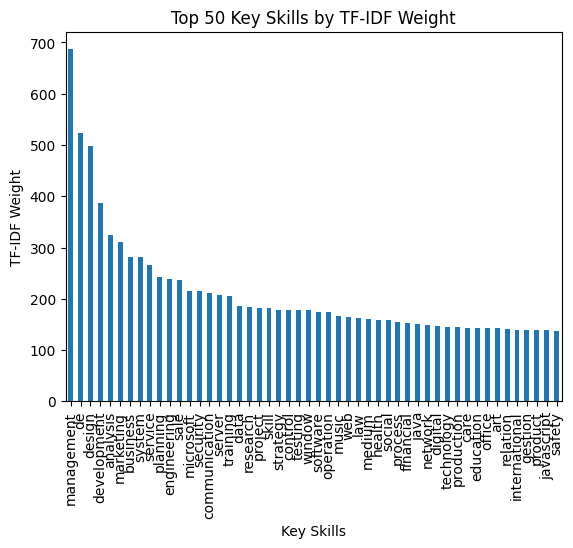

In [94]:
import matplotlib.pyplot as plt


tfidf_df.sum().sort_values(ascending=False).head(50).plot(kind='bar')
plt.title('Top 50 Key Skills by TF-IDF Weight')
plt.xlabel('Key Skills')
plt.ylabel('TF-IDF Weight')
plt.show()

In [95]:
terms = tfidf_vectorizer.get_feature_names_out()
print(terms)

['10' '13485' '14000' ... 'zelfstandig' 'zend' 'zone']


In [96]:
from tqdm import tqdm

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tqdm.pandas()

term_frequencies = tfidf_df.progress_apply(lambda x: x.sum())

term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies})

term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)

print(term_freq_df.head())

100%|██████████| 4147/4147 [00:01<00:00, 2680.81it/s]

                    Term   Frequency
management    management  686.528830
de                    de  523.315216
design            design  497.086221
development  development  387.583426
analysis        analysis  325.200073


In [97]:
term_freq_df.to_excel('./term_frequencies.xlsx', index=False)

In [98]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

data_for_clustering = tfidf_df.sample(frac=0.2, random_state=42)
num_clusters = 22
agglomerative_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

print("Clustering in progress...")
agglomerative_labels = agglomerative_cluster.fit_predict(data_for_clustering)
print("Clustering completed.")

data_for_clustering['agglomerative_cluster_label'] = agglomerative_labels

print(data_for_clustering[['agglomerative_cluster_label']])

Clustering in progress...
Clustering completed.
       agglomerative_cluster_label
16421                            0
1503                            16
15779                            3
19460                            0
3690                             4
...                            ...
6788                             0
11315                            0
17931                            0
22763                            0
563                              0

[5787 rows x 1 columns]


In [99]:
result_df = pd.DataFrame({
    'Cluster_Label': agglomerative_labels
})

result_df.to_csv('./result_of_clustering.csv', index=False)

print(result_df[['Cluster_Label']])

      Cluster_Label
0                 0
1                16
2                 3
3                 0
4                 4
...             ...
5782              0
5783              0
5784              0
5785              0
5786              0

[5787 rows x 1 columns]


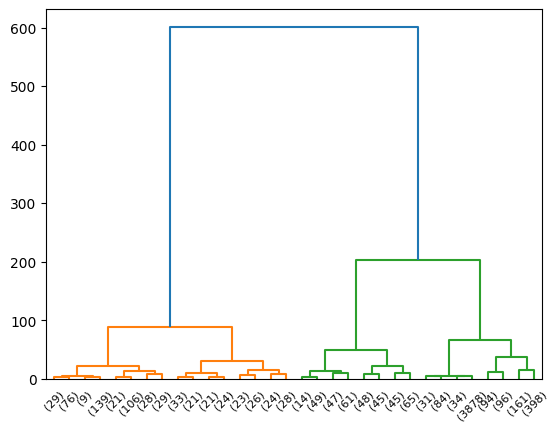

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linkage_matrix = linkage(data_for_clustering, method='ward')

dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()


Cophenetic Correlation Coefficient: 0.9618451524154751


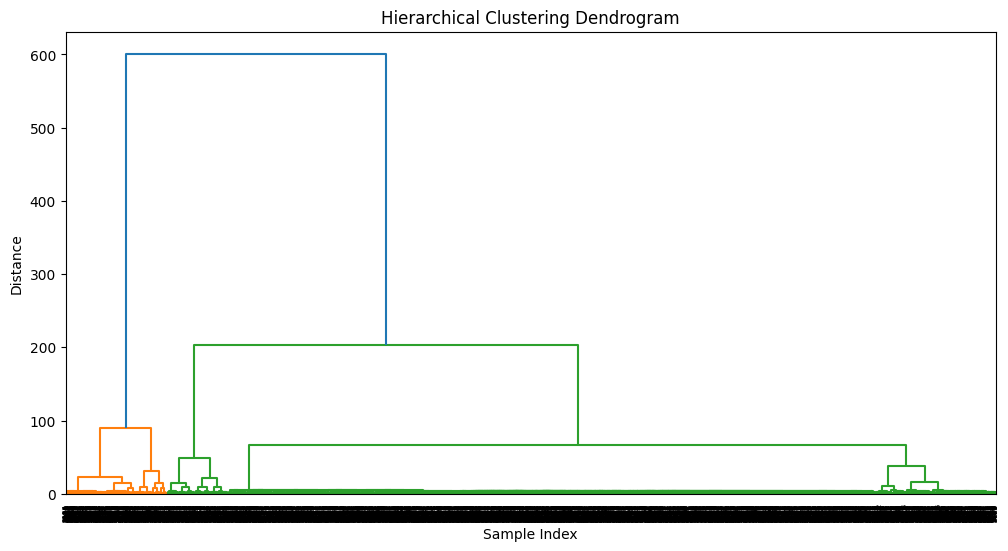

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

Z = linkage_matrix

c, coph_dists = cophenet(Z, pdist(data_for_clustering))

print(f'Cophenetic Correlation Coefficient: {c}')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [102]:
c, coph_dists = cophenet(Z, pdist(data_for_clustering))

print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.9618451524154751


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5787 samples in 0.164s...
[t-SNE] Computed neighbors for 5787 samples in 1.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5787
[t-SNE] Computed conditional probabilities for sample 2000 / 5787
[t-SNE] Computed conditional probabilities for sample 3000 / 5787
[t-SNE] Computed conditional probabilities for sample 4000 / 5787
[t-SNE] Computed conditional probabilities for sample 5000 / 5787
[t-SNE] Computed conditional probabilities for sample 5787 / 5787
[t-SNE] Mean sigma: 0.560586
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.268311
[t-SNE] KL divergence after 1000 iterations: 1.837570


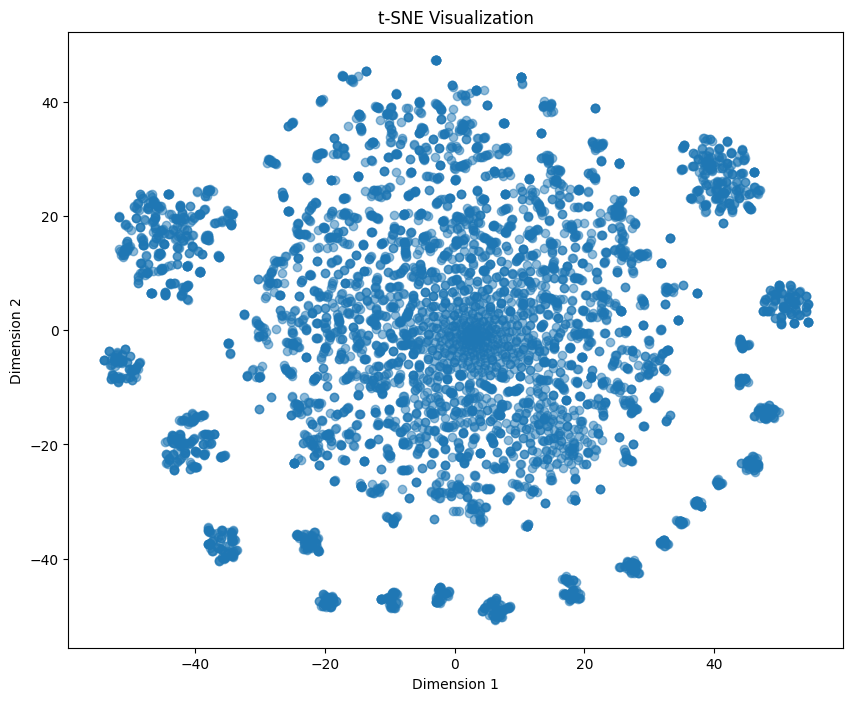

In [103]:
import numpy as np
from sklearn.manifold import TSNE

data_for_clustering
data_tfidf_sne = data_for_clustering

tsne = TSNE(n_components=2, random_state=42, verbose=1, perplexity=40, learning_rate=30, n_iter=1000)

data_tsne = tsne.fit_transform(data_tfidf_sne)

plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [104]:
from scipy.cluster.hierarchy import fcluster

# Максимальна дистанція для формування кластерів
max_distance = 1

# Отриманя інфи для дистанціїї кожного рівня кластерів
clusters = fcluster(Z, max_distance, criterion='distance')

# Вивід
for i in range(min(clusters), max(clusters) + 1):
    num_clusters = sum(clusters == i)
    print(f'Clusters at distance {i}: {num_clusters}')

Clusters at distance 1: 2
Clusters at distance 2: 4
Clusters at distance 3: 3
Clusters at distance 4: 1
Clusters at distance 5: 6
Clusters at distance 6: 7
Clusters at distance 7: 1
Clusters at distance 8: 1
Clusters at distance 9: 3
Clusters at distance 10: 1
Clusters at distance 11: 4
Clusters at distance 12: 4
Clusters at distance 13: 3
Clusters at distance 14: 1
Clusters at distance 15: 3
Clusters at distance 16: 1
Clusters at distance 17: 1
Clusters at distance 18: 1
Clusters at distance 19: 1
Clusters at distance 20: 1
Clusters at distance 21: 4
Clusters at distance 22: 3
Clusters at distance 23: 1
Clusters at distance 24: 1
Clusters at distance 25: 4
Clusters at distance 26: 2
Clusters at distance 27: 2
Clusters at distance 28: 2
Clusters at distance 29: 2
Clusters at distance 30: 2
Clusters at distance 31: 1
Clusters at distance 32: 3
Clusters at distance 33: 1
Clusters at distance 34: 2
Clusters at distance 35: 3
Clusters at distance 36: 3
Clusters at distance 37: 3
Clusters a

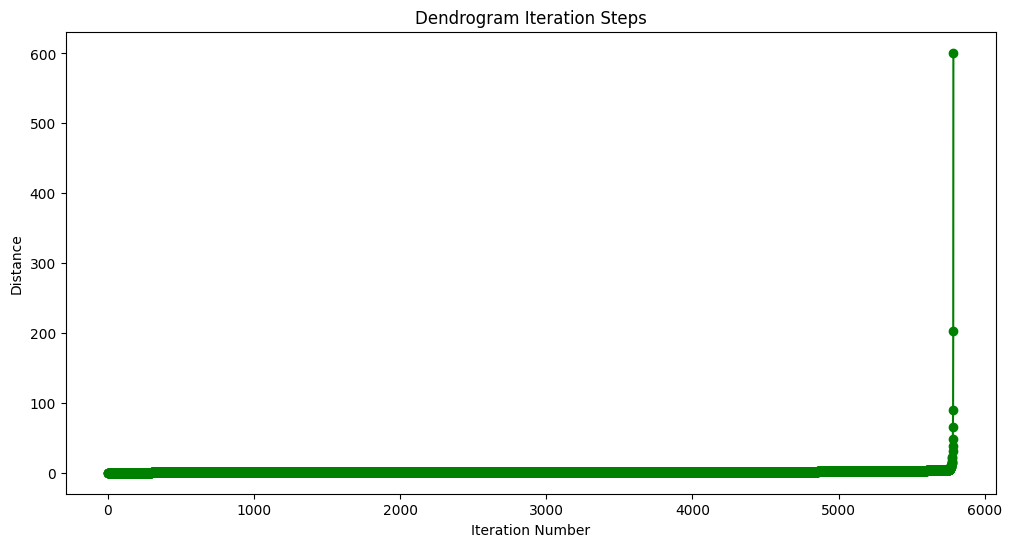

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Дистанція між калстерами
distances = Z[:, 2]

# Номери інтераціїї
iteration_numbers = np.arange(1, len(distances) + 1)

plt.figure(figsize=(12, 6))
plt.plot(iteration_numbers, distances, marker='o', linestyle='-', color='g')
plt.title('Dendrogram Iteration Steps')
plt.xlabel('Iteration Number')
plt.ylabel('Distance')
plt.show()

In [106]:
from scipy.cluster.hierarchy import fcluster

max_distance = 1
clusters = fcluster(Z, max_distance, criterion='distance')
for i in range(min(clusters), max(clusters) + 1):
    num_clusters = sum(clusters == i)
    print(f'Clusters at distance {i}: {num_clusters}')

Clusters at distance 1: 2
Clusters at distance 2: 4
Clusters at distance 3: 3
Clusters at distance 4: 1
Clusters at distance 5: 6
Clusters at distance 6: 7
Clusters at distance 7: 1
Clusters at distance 8: 1
Clusters at distance 9: 3
Clusters at distance 10: 1
Clusters at distance 11: 4
Clusters at distance 12: 4
Clusters at distance 13: 3
Clusters at distance 14: 1
Clusters at distance 15: 3
Clusters at distance 16: 1
Clusters at distance 17: 1
Clusters at distance 18: 1
Clusters at distance 19: 1
Clusters at distance 20: 1
Clusters at distance 21: 4
Clusters at distance 22: 3
Clusters at distance 23: 1
Clusters at distance 24: 1
Clusters at distance 25: 4
Clusters at distance 26: 2
Clusters at distance 27: 2
Clusters at distance 28: 2
Clusters at distance 29: 2
Clusters at distance 30: 2
Clusters at distance 31: 1
Clusters at distance 32: 3
Clusters at distance 33: 1
Clusters at distance 34: 2
Clusters at distance 35: 3
Clusters at distance 36: 3
Clusters at distance 37: 3
Clusters a

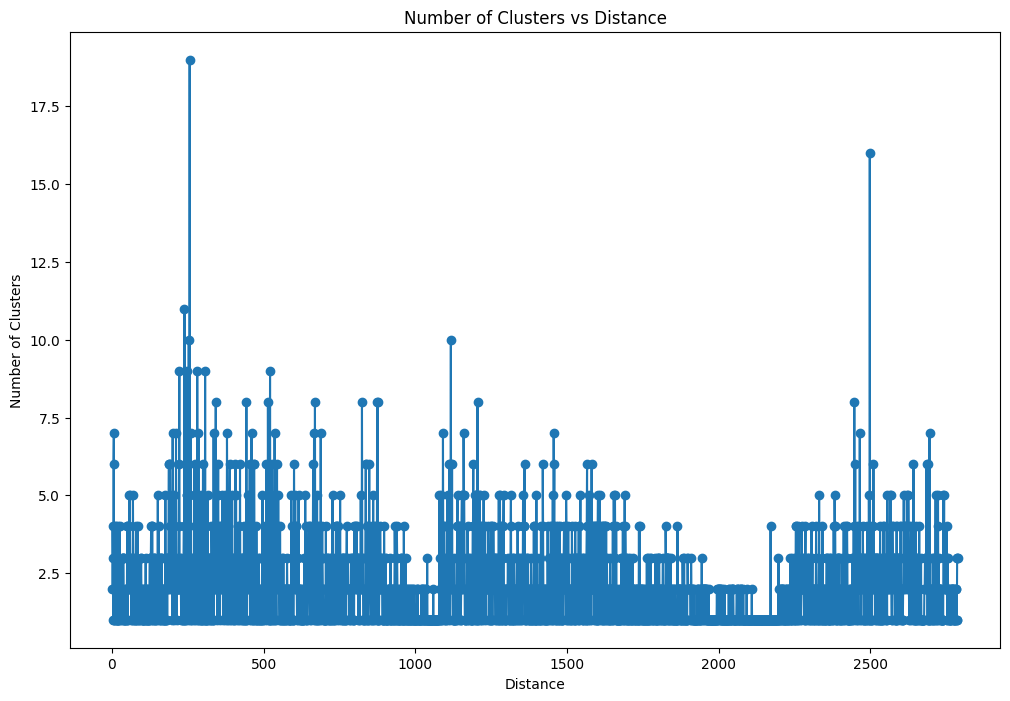

In [107]:
plt.figure(figsize=(12, 8))
plt.plot(range(min(clusters), max(clusters) + 1), [sum(clusters == i) for i in range(min(clusters), max(clusters) + 1)], marker='o')
plt.title('Number of Clusters vs Distance')
plt.xlabel('Distance')
plt.ylabel('Number of Clusters')
plt.show()

Clusters at cut level 22:
[0 1 2 ... 0 0 0]


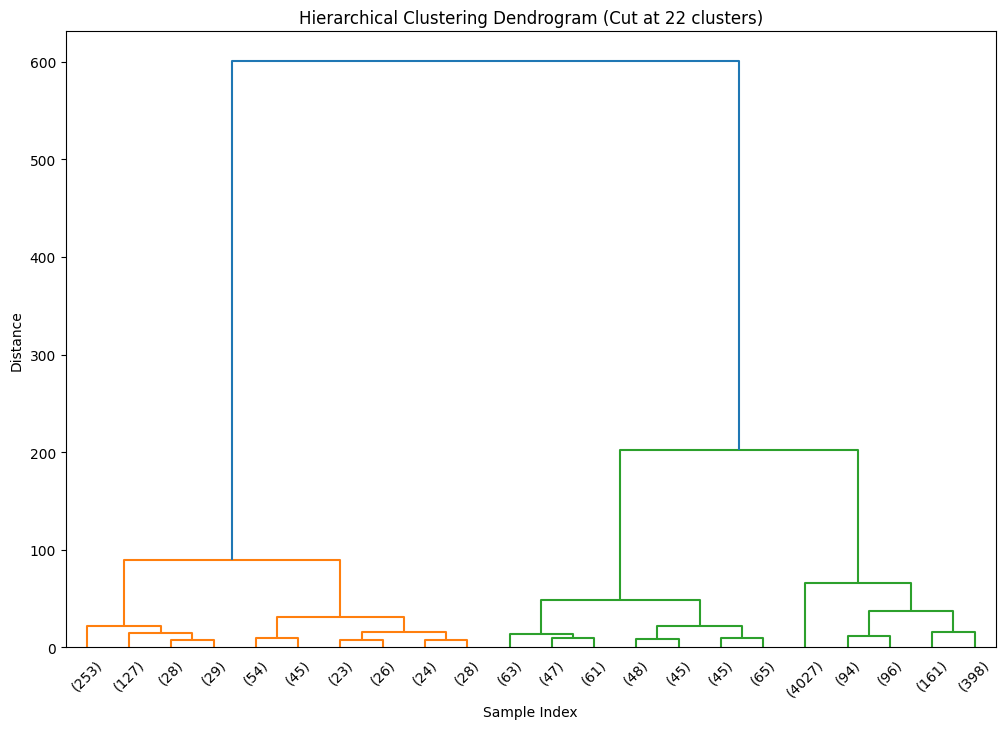

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Рівень обрізки
cut_level = 22

cut_result = cut_tree(Z, n_clusters=cut_level).flatten()
print(f"Clusters at cut level {cut_level}:\n{cut_result}")

plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=cut_level)
plt.title(f'Hierarchical Clustering Dendrogram (Cut at {cut_level} clusters)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [109]:
print("Results of Hierarchical Clustering:")
for i, label in enumerate(cut_result):
    print(f"Sample {i}: Cluster {label}")

Results of Hierarchical Clustering:
Sample 0: Cluster 0
Sample 1: Cluster 1
Sample 2: Cluster 2
Sample 3: Cluster 0
Sample 4: Cluster 3
Sample 5: Cluster 4
Sample 6: Cluster 5
Sample 7: Cluster 0
Sample 8: Cluster 0
Sample 9: Cluster 0
Sample 10: Cluster 0
Sample 11: Cluster 0
Sample 12: Cluster 6
Sample 13: Cluster 0
Sample 14: Cluster 0
Sample 15: Cluster 7
Sample 16: Cluster 0
Sample 17: Cluster 0
Sample 18: Cluster 0
Sample 19: Cluster 0
Sample 20: Cluster 0
Sample 21: Cluster 0
Sample 22: Cluster 4
Sample 23: Cluster 0
Sample 24: Cluster 0
Sample 25: Cluster 0
Sample 26: Cluster 0
Sample 27: Cluster 0
Sample 28: Cluster 0
Sample 29: Cluster 0
Sample 30: Cluster 0
Sample 31: Cluster 6
Sample 32: Cluster 6
Sample 33: Cluster 8
Sample 34: Cluster 4
Sample 35: Cluster 0
Sample 36: Cluster 4
Sample 37: Cluster 0
Sample 38: Cluster 0
Sample 39: Cluster 0
Sample 40: Cluster 9
Sample 41: Cluster 0
Sample 42: Cluster 0
Sample 43: Cluster 0
Sample 44: Cluster 0
Sample 45: Cluster 1
Sample 4

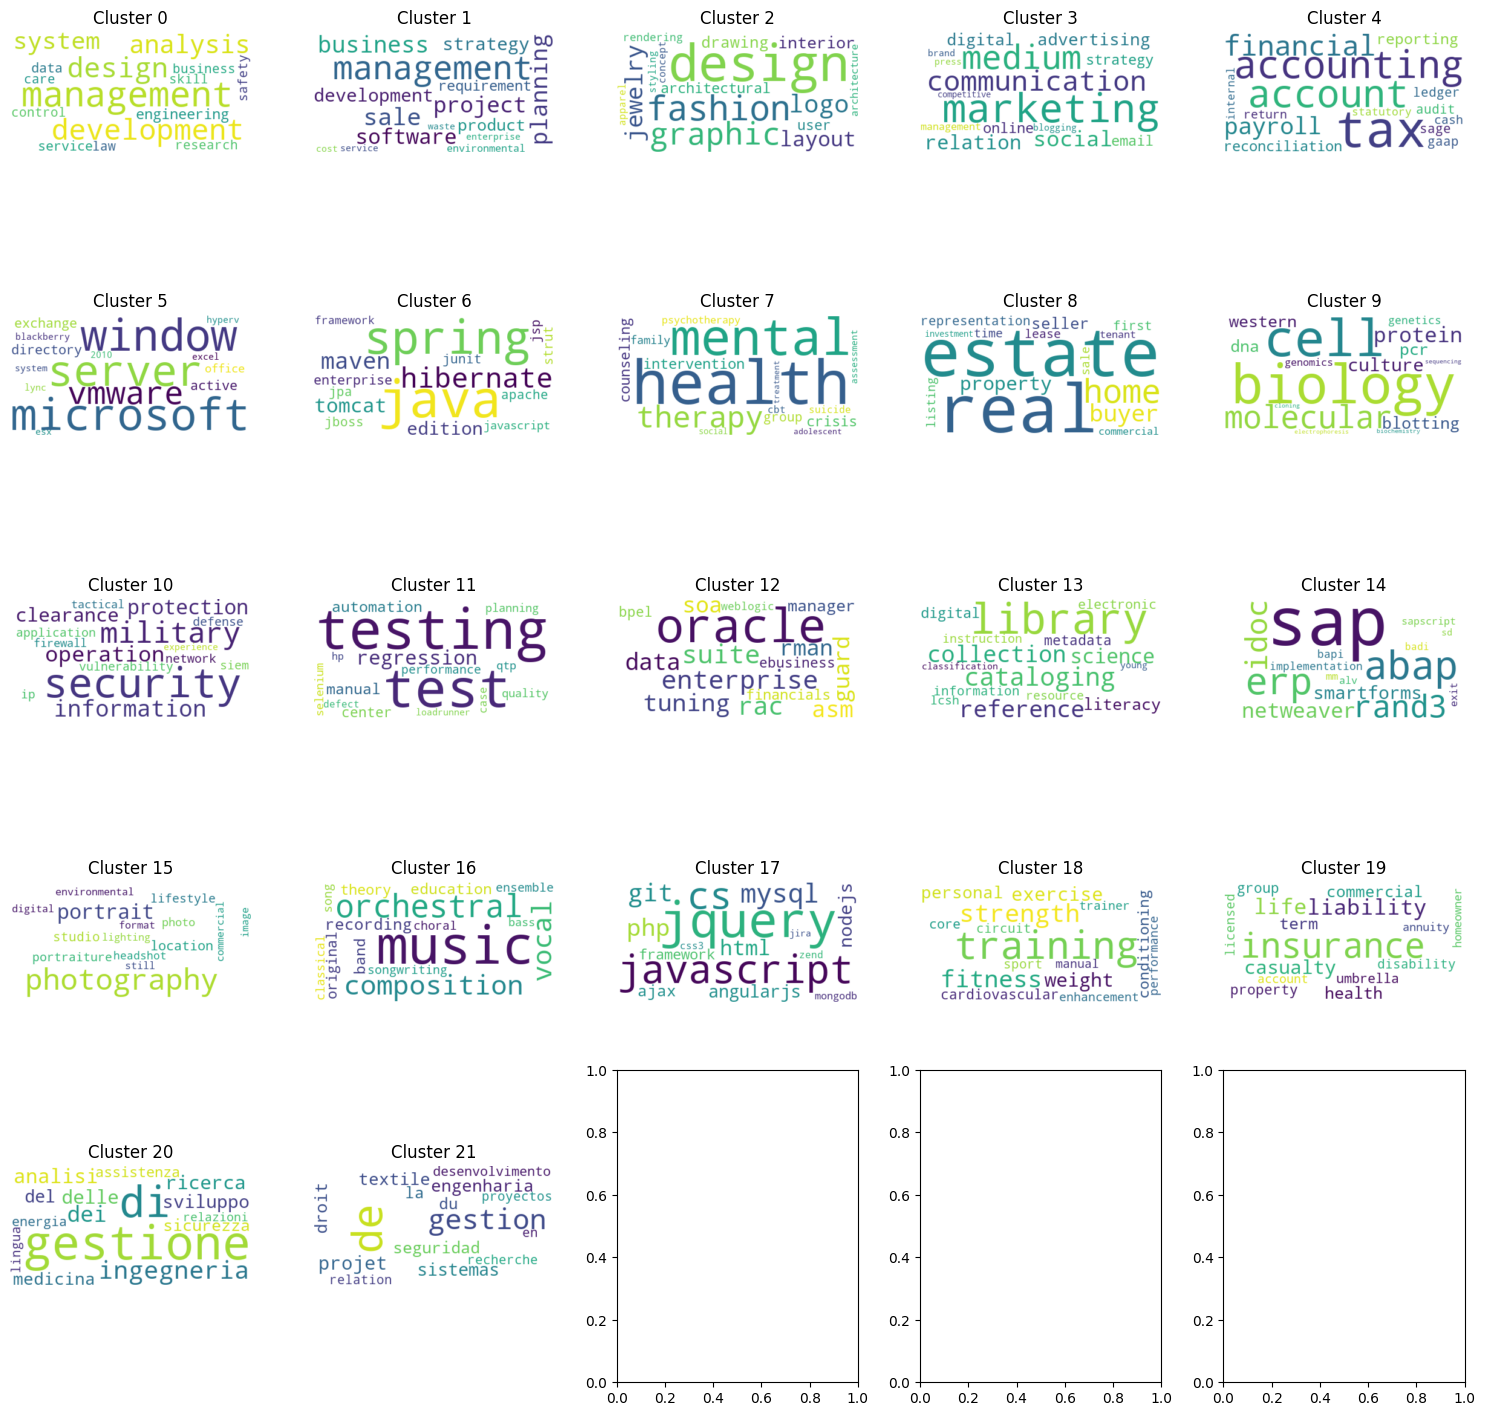

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from math import ceil

cluster_labels = sorted(data_for_clustering['agglomerative_cluster_label'].unique())
num_clusters = len(cluster_labels)
num_cols = 5
num_rows = ceil(num_clusters / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, cluster_label in enumerate(cluster_labels):
    row_idx = i // num_cols
    col_idx = i % num_cols

    cluster_data = data_for_clustering[data_for_clustering['agglomerative_cluster_label'] == cluster_label]
    cluster_terms = cluster_data.drop('agglomerative_cluster_label', axis=1).mean()
    top_terms = cluster_terms.sort_values(ascending=False).head(20)  # Выберите топ N терминов

    terms_weights = {term: weight for term, weight in zip(top_terms.index, top_terms.values)}

    wordcloud = WordCloud(width=400, height=200, background_color='white', collocations=False, max_words=15).generate_from_frequencies(terms_weights)

    axes[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
    axes[row_idx, col_idx].set_title(f'Cluster {cluster_label}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

In [111]:
for cluster_label, cluster_data in clustered_data:
    print(f"Cluster {cluster_label} Terms:")
    cluster_terms = cluster_data.drop('agglomerative_cluster_label', axis=1).mean()
    top_terms = cluster_terms.sort_values(ascending=False).head(20)  # Выберите топ N терминов
    print(top_terms)
    print("\n")

NameError: name 'clustered_data' is not defined

In [ ]:
# DataFrame с результатами t-SNE и метками кластеров
tsne_df = pd.DataFrame({
    'tsne_1': data_tsne_x[:, 0],
    'tsne_2': data_tsne_x[:, 1],
    'agglomerative_cluster_label': data_for_clustering['agglomerative_cluster_label']
})

# Результаты с цветовой схемой, отражающей метки кластеров
plt.figure(figsize=(15, 13))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='agglomerative_cluster_label', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Cluster Labels')
plt.show()

NameError: name 'data_tsne_x' is not defined